In [ ]:
# 업데이트
!pip install -U pandas-profiling

In [48]:
# 한글출력을 위함 (나눔체 설치)
# 실행 후 리빌드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

In [3]:
# 기본적으로 사용할 라이브러리 종류
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (3).csv


Name : 게임의 이름입니다. <br/>
Platform : 게임이 지원되는 플랫폼의 이름입니다. <br/>
Year : 게임이 출시된 연도입니다. <br/>
Genre : 게임의 장르입니다. <br/>
Publisher : 게임을 배급한 회사입니다. <br/>
NA_Sales : 북미지역에서의 출고량입니다. <br/>
EU_Sales : 유럽지역에서의 출고량입니다. <br/>
JP_Sales : 일본지역에서의 출고량입니다. <br/>
Other_Sales : 기타지역에서의 출고량입니다.


# **다음 분기에 어떤 게임을 설계해야 할까**
를 정하는 과정과 그 결과를 보여주는 것이 목표. <br/>
**! 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력 !** 

**1. 지역에 따라서 선호하는 게임 장르가 다를까? <br/>
**2. 연도별 게임의 트렌드가 있을까? <br/>
**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함 <br/>**

In [6]:
# 데이터셋 확인
df = pd.read_csv('vgames2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [445]:
df.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [485]:
# 시각적탐색 시작
df.sample(30)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8392,8393,Kobitodzukan: Kobito Kansatsu Set,3DS,2012.0,Misc,Nippon Columbia,0,0K,0.28,0
3938,3939,Disney Sing It: Pop Hits,Wii,2009.0,Misc,Disney Interactive Studios,1.08,0.28,0,0.13
7288,7289,Chrysler Classic Racing,DS,2008.0,Racing,Zoo Games,0.02,0,0,0
10440,10441,Crayon Shin-Chan: Densetsu o Yobu Omake no To ...,GBA,2006.0,Action,Banpresto,0,0,0.07,0
2012,2013,Chili Con Carnage,PSP,2007.0,Shooter,Eidos Interactive,0,0.02,0,0.01
4624,4625,Auto Modellista,GC,2003.0,Racing,Capcom,0.02,0.01,0,0
1040,1041,Syphon Filter: Logan's Shadow,PS2,2010.0,Shooter,Sony Computer Entertainment,0.03,0.02,0,0.01
15034,15035,LEGO Indiana Jones: The Original Adventures,PC,2008.0,Action,LucasArts,0.02,0.02,0,0.01
7597,7598,Stronghold,PC,2001.0,Strategy,Gathering of Developers,0M,0.09,0,0.02
2590,2591,[Prototype],X360,2009.0,Action,Activision,0.84,0.35,0,0.12


In [8]:
# 필요없는 컬럼 제거, Unnamed컬럼 삭제 (o)
# 중복데이터 확인 (o)
# 결측치 제거, 대체값 확인, 복사본 만들 것 (o)
# Year컬럼 .0 삭제, int타입으로 변경, 이상치에 대해 변환 필요(00, 1, 2, 3 ...) (o)
# Name컬럼에 한글 제거 (o)
# Platform컬럼 2600 -> atari2600으로 번경 (o)
# 퍼블리셔 Unknown은 우리가 알고자하는 결과값에 영향을 미치는 요소가 아니기에 무시 (o)
# 출고량 int 타입으로 변경, M&K 단위 통일 필요, M&&K 문자제거, 소숫점 제거.. 디폴트단위 : M (o)
# 위의 전처리 마친 후에 다시 한 번 중복데이터 확인하기. (o)
# 미래의 나에게: 한글을 표시할 수 있는 코드 삽입 부탁합니다. (o)

# 나중에 나라별로 데이터프레임을 분리하는 것이 좋을까?
# 연도에 따른 플랫폼 별 인기도도 보고싶음.
# 비율이 작아도 영향을 미칠 수 있는 값이라면..?

In [9]:
# 불필요한 Unnamed 컬럼 삭제
game = df.drop(df.columns[0], axis=1)
game 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
# 결측값이 있는 행 확인
game.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
# Genre컬럼에 있는 결측치를 추출
genre_nan = game[game['Genre'].isna()]
genre_nan

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [ ]:
# Genre컬럼에서 결측치가 있는 행의 인덱스를 추출하여 새로운 컬럼을 생성하여 저장.
genre_nan['chk_index'] = genre_nan.index

In [13]:
# index 재정렬해주기.
# 50 ~ 16587 -> 0 ~ 49
genre_nan.reset_index(drop=True, inplace=True)
genre_nan

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,chk_index
0,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,50
1,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02,408
2,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02,1328
3,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57,1582
4,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79,1971
5,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03,2043
6,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0,2497
7,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03,3353
8,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0,3363
9,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0,3470


In [14]:
# # i가 고정값(NaN) j가 비교 대상값.
# # 함수 실패
# def vlookup(game):
#   for i in range(len(game)):
#       for j in range(len(game)):
#         if pd.isnull(game['Genre'][i]):
#           if game['Name'][i] == game['Name'][j]:
#             game['Genre'][i] = game['Genre'][j]

# return game
# game = vlookup(range(len(game)))


### 무한로딩
# for i in range(len(game)):
#   for j in range(len(game)):
#     if pd.isnull(game['Genre'][i]):
#        if game['Name'][i] == game['Name'][j]:
#           game['Genre'][i] = game['Genre'][j]



### True값을 추출할 수 있음. 즉, str의 NaN값 여부를 확인할 수 있음.
# game['Name'][20].isnull()
# pd.isnull(game['Genre'][5668])

In [15]:
# 원본 데이터 프레임(game)과 추출한 데이터 프레임(genre_nan)의 컬럼내용(게임이름)을 비교하여 장르 값을 추출하기.
for i in range(len(genre_nan)):
  for j in range(len(game)):
    if game['Name'][j] == genre_nan['Name'][i]:
      genre_nan['Genre'][i] = game['Genre'][j]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
# genre_nan데이터프레임의 컬럼(chk_index)을 오름차순으로 재정렬.
genre_nan = genre_nan.sort_values(by=genre_nan.columns[9])
genre_nan

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,chk_index
0,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,50
1,NBA Ballers,XB,2004.0,Sports,Midway Games,0.37,0.11,0,0.02,408
2,NFL Street,XB,2004.0,Sports,Electronic Arts,0.49,0.15,0,0.02,1328
3,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57,1582
4,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79,1971
5,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03,2043
6,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0,2497
7,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03,3353
8,Ski-Doo Snowmobile Challenge,X360,2009.0,Racing,Valcon Games,0.03,0,0,0,3363
9,Batman Beyond: Return of the Joker,N64,2000.0,Action,Ubisoft,0.07,0.02,0,0,3470


In [17]:
# vlookup 기능으로 추출한 데이터를 원래의 데이터프레임에 넣어주기.
for i in range(len(genre_nan)):
  for index in range(len(game)):
    if index == genre_nan['chk_index'][i]:
      game['Genre'][index] = genre_nan['Genre'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
# 값이 제대로 삽입되었음을 확인
game['Genre'][11699]

'Adventure'

In [19]:
# 결측치를 메운 후 남은 결측치 갯수
# Genre 50 -> 36개로 감소
game.isnull().sum()

Name             0
Platform         0
Year           271
Genre           36
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [20]:
# 똑같은 방식으로 Year컬럼도 채울 수 있는지 확인.
# 같은 명의 게임이어도 플랫폼마다 출시일이 다를 수 있음을 확인.
# 따라서 Year컬럼의 결측치는 채우지 않는다.
# Publisher 행도 우리가 알고자 하는 결과값에 영향을 미치지 않으므로 결측치를 채우지 않는다.
game[game['Name'].str.contains('18 Wheeler: American Pro Trucker')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8685,18 Wheeler: American Pro Trucker,GC,2002.0,Racing,Acclaim Entertainment,0.09,0.02,0,0
10989,18 Wheeler: American Pro Trucker,PS2,2001.0,Racing,Acclaim Entertainment,0.2,0.15,0M,0.05


In [21]:
# 결측값이 존재하는 행 확인 총 (343행)
nan = game[game['Year'].isnull() | game['Genre'].isnull() | game['Publisher'].isnull()]
nan

# 전체 데이터프레임 수에 비해 작은 비율을 차지하므로 '삭제'를 결정: 0.021
round(len(nan) / len(game), 3)

# 결측치 데이터 삭제
game.drop(nan.index, inplace=True)
game.reset_index(drop=True, inplace=True)

# 결측치가 제거됨을 확인
game.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [22]:
### Year컬럼 전처리 시작.
# .과 0 제거. 한 자릿수 혹은 두 자릿수의 값은 20 혹은 200을 붙혀줍니다.

# 컬럼의 타입변경 float -> int
game['Year'] = game['Year'].apply(np.int)

# 타입확인 dtype('int64')
game['Year'].dtypes

# 년도 이상치 확인
game[game['Year'] < 1000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15655,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
15770,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
15815,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16056,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [23]:
### 최초의 비디오 게임은 1950년대 초 탄생. 따라서,
# 0 ~ 16값은 2000년대로 추정
# 86 ~ 100값은 1900년대로 추청
g_y = game['Year'].unique()
g_y.sort()
g_y

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   86,   94,   95,   96,   97,
         98, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])

In [24]:
# 0 ~ 16값을 추출하여 2000을 더해주기
less_17 = game.query('(Year >= 0) and (Year < 17)')
less_17.Year += 2000
less_17.Year

# 86 ~ 100값(정확히는 86 ~ 98)을 추출 하여 1900을 더해주기.
less_100 = game.query('(Year >= 17) and (Year < 100)')
less_100.Year += 1900
less_100.Year

# 데이터 프레임에 변경된 값 삽입해주기.
game['Year'].loc[less_17.index] = less_17.Year
game['Year'].loc[less_100.index] = less_100.Year

# 결과값 확인
game['Year'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [25]:
### Name 컬럼에 존재하는 이상치(한글) 제거하기.
game.Name = game.Name.str.replace('r[^가-힣]', '')

# 더이상 이상치가 존재하지 않음을 확인.
game[game['Name'].str.contains('r[^가-힣]') == True]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [26]:
# Platform 컬럼에 존재하는 2600을 atari2600으로 대체하기
# 다른 플랫폼의 시리즈와 헷갈릴 수 있으므로, 이름을 명확하게 지정.
game.Platform = game.Platform.str.replace('2600', 'atari2600')
game.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', 'atari2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
### Sales 컬럼들 전처리.
# 디폴트(소수점, 단위에 대한 표식이 없는 형태) M 1,000,000
# M: 1,000,000 K: 1,000
# 'M'문자 제거. K 단위를 M 단위로 변환. 실무에서도 1,000단위로 압축하여 데이터를 관리 및 사용했었다.

# M단위는 그대로 냅두고 'M'문자열만 삭제하기
game.NA_Sales = game.NA_Sales.str.replace('M', '')
game.NA_Sales.unique()

# 'K'문자가 존재하는 행 추출
ktom_na = game[game['NA_Sales'].str.contains('K')]

# 'K'문자 제거
ktom_na.NA_Sales = ktom_na.NA_Sales.str.replace('K', '')

# 데이터 타입을 objec -> float로 변경
ktom_na['NA_Sales'] = ktom_na['NA_Sales'].astype(float)

# 단위를 맞추기 위해 1,000으로 나눠주기.
ktom_na['NA_Sales'] = ktom_na['NA_Sales'].mul(0.001)

# 단위가 변경된 값을 원래의 NA_Sales컬럼에 삽입
game.NA_Sales.loc[ktom_na.NA_Sales.index] = ktom_na.NA_Sales

# game.NA_Sales 컬럼 타입을 float로 변경해주기.
# K값은 계속 object타입이었기에.
game.NA_Sales = game.NA_Sales.astype(float)


# 다른 컬럼도 동일하게 작업 해주기
# 함수 혹은 for문을 사용해도 좋을 것 같은데..
# EU_Sales
game.EU_Sales = game.EU_Sales.str.replace('M', '')
game.EU_Sales.unique()

ktom_eu = game[game['EU_Sales'].str.contains('K')]
ktom_eu.EU_Sales = ktom_eu.EU_Sales.str.replace('K', '')

ktom_eu['EU_Sales'] = ktom_eu['EU_Sales'].astype(float)
ktom_eu['EU_Sales'] = ktom_eu['EU_Sales'].mul(0.001)

game.EU_Sales.loc[ktom_eu.EU_Sales.index] = ktom_eu.EU_Sales
game.EU_Sales = game.EU_Sales.astype(float)


# JP_Sales
game.JP_Sales = game.JP_Sales.str.replace('M', '')
game.JP_Sales.unique()

ktom_jp = game[game['JP_Sales'].str.contains('K')]
ktom_jp.JP_Sales = ktom_jp.JP_Sales.str.replace('K', '')

ktom_jp['JP_Sales'] = ktom_jp['JP_Sales'].astype(float)
ktom_jp['JP_Sales'] = ktom_jp['JP_Sales'].mul(0.001)

game.JP_Sales.loc[ktom_jp.JP_Sales.index] = ktom_jp.JP_Sales
game.JP_Sales = game.JP_Sales.astype(float)


# Other_Sales
game.Other_Sales = game.Other_Sales.str.replace('M', '')
game.Other_Sales.unique()

ktom_otr = game[game['Other_Sales'].str.contains('K')]
ktom_otr.Other_Sales = ktom_otr.Other_Sales.str.replace('K', '')

ktom_otr['Other_Sales'] = ktom_otr['Other_Sales'].astype(float)
ktom_otr['Other_Sales'] = ktom_otr['Other_Sales'].mul(0.001)

game.Other_Sales.loc[ktom_otr.Other_Sales.index] = ktom_otr.Other_Sales
game.Other_Sales = game.Other_Sales.astype(float)

In [28]:
# 확인
game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Facto,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shite Poable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal oNo Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16250,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16251,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16252,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16253,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [29]:
# 중복되는 행 확인
game[game.duplicated()]

# 중복되는 행 제거
game.drop_duplicates(inplace=True)
game.reset_index(drop=True, inplace=True)

# 제거되었는지 확인
game[game.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [30]:
# 통계치 확인
game.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16255.000000,16255.000000,16255.000000,16255.000000,16255.000000
mean,2006.408121,0.265175,0.147333,0.078219,0.048221
std,5.830828,0.822121,0.508156,0.309147,0.189602
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


(0.0, 8.0)

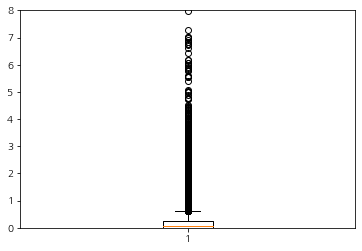

In [31]:
# 75%와 max사이에 급격한 차이가 보인다. 이상치가 있는 것일까?
# 출고량에 이상치가 있다고 할 수 있을까?
plt.boxplot(game['NA_Sales'])
plt.ylim(0, 8)

In [32]:
# 사실을 확인해보니 Wii Sports의 판매량이 8,290만 장이라고 한다.
# 이상치가 아니라 옳은 값이다.
# 검색하다보니 이름이 잘못들어가 있는 것이 확인이 되었다. 이름을 변경해주자.
game[game['NA_Sales'].max() == game['NA_Sales']] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2857,Wii Spos,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46


In [33]:
# 이름 변경 Wii Spos -> Wii Sports
game.loc[2855, 'Name'] = 'Wii Sports'

# 확인
game.loc[2855]

Name             Wii Sports
Platform                PS2
Year                   2005
Genre                Sports
Publisher      Valcon Games
NA_Sales               0.05
EU_Sales               0.04
JP_Sales                0.0
Other_Sales            0.01
Name: 2855, dtype: object

In [34]:
# 게임 이름이 같아도 출시된 플랫폼이 다르니.. Name에서는 중복된 값이 확인 될 수 밖에 없구나.
game.Name.sort_values()

12652                                '98 Koshien
15600                   .hack//G.U. Vol.1//Rebih
6996                .hack//G.U. Vol.2//Reminisce
10445    .hack//G.U. Vol.2//Reminisce (jp sales)
12888              .hack//G.U. Vol.3//Redemption
                          ...                   
3430                    thinkSMART: Chess foKids
13677                                 uDw Studio
14713                   uDw Studio: Instant Aist
3008                    uDw Studio: Instant Aist
212                   ¡Shin Chan Flipa en colos!
Name: Name, Length: 16255, dtype: object

In [35]:
# 끝이 없네. Name에 sales가 포함된 게임들이 있다.
game[game['Name'].str.contains('sales')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
156,Inteational SupetaSocce2000 (JP weekly sales),N64,1999,Sports,Konami Digital Entertainment,0.00,0.00,0.18,0.00
241,"Luna2: Eteal Blue(sales, but wng system)",GEN,1994,Role-Playing,Game Arts,0.00,0.00,0.14,0.00
391,Wild ARMs 5 (jp sales),PS2,2006,Role-Playing,505 Games,0.00,0.00,0.12,0.00
576,Imagine: Figu Skate(US sales),DS,2007,Sports,Ubisoft,0.46,0.01,0.00,0.00
804,Nato: Ultimate Ninja (JP sales),PS2,2003,Fighting,Atari,0.00,0.00,0.32,0.00
...,...,...,...,...,...,...,...,...,...
15769,Chou-Kuukan Night P Yakyuu King(higheJP sales),N64,1996,Sports,Imagineer,0.00,0.00,0.22,0.00
15904,Magical Staign (US sales),DS,2006,Role-Playing,Nintendo,0.16,0.03,0.00,0.00
16079,TouchMaste3(Othe sales),DS,2009,Puzzle,Warner Bros. Interactive Entertainment,0.00,0.24,0.00,0.02
16169,Fatal Fu: Battle Ahives Volume 1 (JP sales),PS2,2006,Fighting,Ignition Entertainment,0.00,0.00,0.01,0.00


In [36]:
# 우리가 알고자 하는 정보는 장르별/연도별/출고량 이니, 
# '지역별 출고명과 함께 적혀있는 게임명'을 굳이 원본 게임명과 통합하지 않아도 괜찮을 듯 하다.
game[game['Name'].str.contains('nteational SupetaSocce2000')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
156,Inteational SupetaSocce2000 (JP weekly sales),N64,1999,Sports,Konami Digital Entertainment,0.00,0.00,0.18,0.00
3847,Inteational SupetaSocce2000 (All gion sales),N64,1999,Sports,Konami Digital Entertainment,0.01,0.26,0.22,0.02
6199,Inteational SupetaSocce2000,PS2,2000,Sports,Konami Digital Entertainment,0.00,0.00,0.20,0.00


In [37]:
# 전체출고량 대비 나라별 출고 비율을 알기위해서 전체출고량 컬럼 생성
game['Total_Sales'] = game['NA_Sales'] + game['EU_Sales'] + game['JP_Sales'] + game['Other_Sales']

In [38]:
### 전처리 완료 ###
# 2020년 코로나 발생. 이후 게임산업의 동향은 어떻게 될 것인가?
# 스트레스를 풀기위해 액션이 유행할 것인가?
# 마음을 달래기 위해 리듬게임 같은 힐링게임이 유행할 것인가?
# 게임시장의 전체적인 모습도 볼 줄 알아야 함.
# 모바일은 없군요?

# 목표 재확인
**다음 분기에 어떤 게임을 설계해야 할까?** 를 정하는 과정과 그 결과를 보여주는 것이 목표. 
<br/><br/>
! 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력 ! <br/>

1. 지역에 따라서 선호하는 게임 장르가 다를까? yes
2. 연도별 게임의 트렌드가 있을까?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함

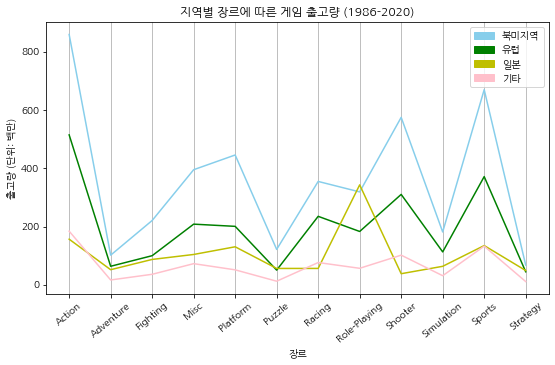

In [55]:
### 1-1. 지역별 선호하는 게임장르 확인 (꺾은선 그래프)
import matplotlib.patches as mpatches

plt.figure(figsize=(9, 5))

group = game.groupby("Genre").sum()
plt.plot(group['NA_Sales'], label="NA", color='skyblue')
plt.plot(group['EU_Sales'], label="EU", color='green')
plt.plot(group['JP_Sales'], label="JP", color='y')
plt.plot(group['Other_Sales'], label="Others", color='pink')

NA = mpatches.Patch(color='skyblue', label='북미지역')
EU = mpatches.Patch(color='green', label='유럽')
AP = mpatches.Patch(color='y', label='일본')
SA = mpatches.Patch(color='pink', label='기타')
plt.legend(handles=[NA,EU,AP,SA], loc=0)

plt.xlabel('장르')
plt.ylabel('출고량 (단위: 백만)')
plt.xticks(rotation=40)
plt.grid(axis='x')
plt.title("지역별 장르에 따른 게임 출고량 (1986-2020)")
plt.show()

In [40]:
# 장르별 지역 출고량 (누적)
groupby_genre = game.groupby('Genre', as_index = False).sum()

# 불필요한 Year컬럼 삭제
groupby_genre = groupby_genre.drop(groupby_genre.columns[1], axis=1)

# 각 나라별 장르 누적 출고량
# genre_na = groupby_genre.iloc[:, [0,1]].sort_values(groupby_genre.columns[1], ascending=False).reset_index(drop=True)
genre_na = groupby_genre.iloc[:, [0,1]]
genre_eu = groupby_genre.iloc[:, [0,2]]
genre_jp = groupby_genre.iloc[:, [0,3]]
genre_otr = groupby_genre.iloc[:, [0,4]]

genre_eu

,Genre,EU_Sales
0,Action,514.45
1,Adventure,63.68
2,Fighting,100.00
3,Misc,208.19
4,Platform,200.64
5,Puzzle,50.47
6,Racing,235.02
7,Role-Playing,183.09
8,Shooter,310.23
9,Simulation,112.99


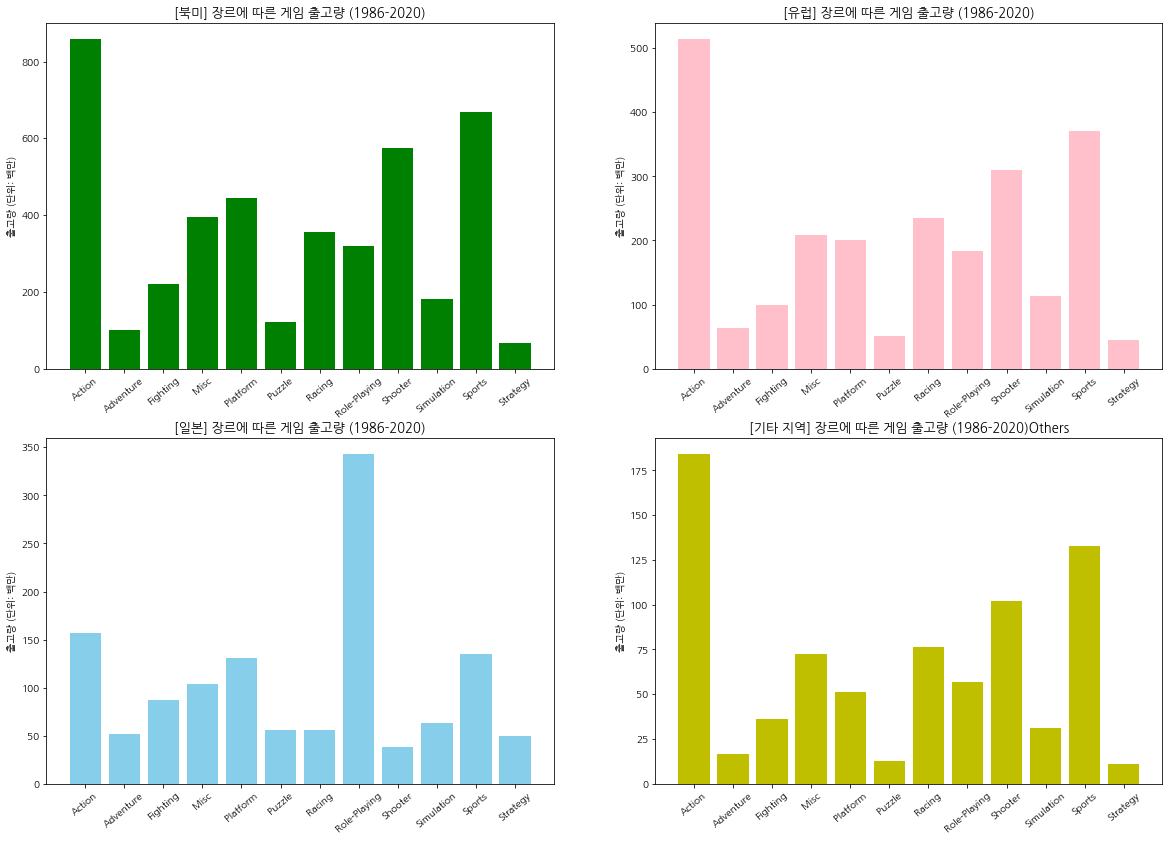

In [96]:
### 1-2. 지역별 선호하는 게임장르 확인 (막대그래프)
plt.figure(figsize=(20, 14))
plt.xticks(rotation=40)

plt.subplot(2, 2, 1)
plt.xticks(rotation=40)
plt.bar(genre_na['Genre'], genre_na['NA_Sales'], color='g')
plt.title('[북미] 장르에 따른 게임 출고량 (1986-2020)', fontsize = 13)
plt.ylabel('출고량 (단위: 백만)')

plt.subplot(2, 2, 2)
plt.bar(genre_na['Genre'], genre_eu['EU_Sales'], color='pink')
plt.xticks(rotation=40)
plt.title('[유럽] 장르에 따른 게임 출고량 (1986-2020)', fontsize = 13)
plt.ylabel('출고량 (단위: 백만)')

plt.subplot(2, 2, 3)
plt.bar(genre_na['Genre'], genre_jp['JP_Sales'], color='skyblue')
plt.xticks(rotation=40)
plt.title('[일본] 장르에 따른 게임 출고량 (1986-2020)', fontsize = 13)
plt.ylabel('출고량 (단위: 백만)')

plt.subplot(2, 2, 4)
plt.bar(genre_otr['Genre'], genre_otr['Other_Sales'], color='y')
plt.xticks(rotation=40)
plt.title('[기타 지역] 장르에 따른 게임 출고량 (1986-2020)Others', fontsize = 13)
plt.ylabel('출고량 (단위: 백만)')

plt.show()

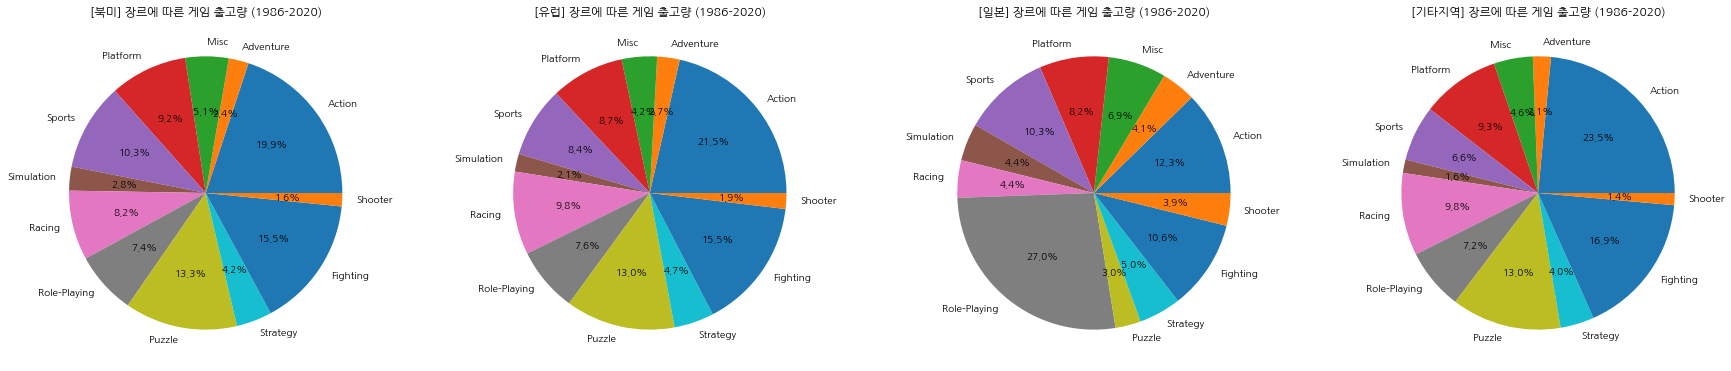

In [487]:
### 1-3. 지역별 선호하는 게임장르 확인 (파이챠트)
# 챠트를 그릴 도화지 갯수 선정
f, axes = plt.subplots(1, 4)

# 격자 크기 설정
f.set_size_inches((30, 30))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 라벨지정
labels = game.Genre.unique()

axes[0].set_title('[북미] 장르에 따른 게임 출고량 (1986-2020)', fontsize = 12)
axes[0].pie(game.groupby('Genre')['NA_Sales'].sum(), labels = labels, autopct='%1.1f%%')

axes[1].set_title('[유럽] 장르에 따른 게임 출고량 (1986-2020)', fontsize = 12)
axes[1].pie(game.groupby('Genre')['EU_Sales'].sum(), labels = labels, autopct='%1.1f%%')

axes[2].set_title('[일본] 장르에 따른 게임 출고량 (1986-2020)', fontsize = 12)
axes[2].pie(game.groupby('Genre')['JP_Sales'].sum(), labels = labels, autopct='%1.1f%%')

axes[3].set_title('[기타지역] 장르에 따른 게임 출고량 (1986-2020)', fontsize = 12)
axes[3].pie(game.groupby('Genre')['Other_Sales'].sum(), labels = labels, autopct='%1.1f%%')

plt.show()

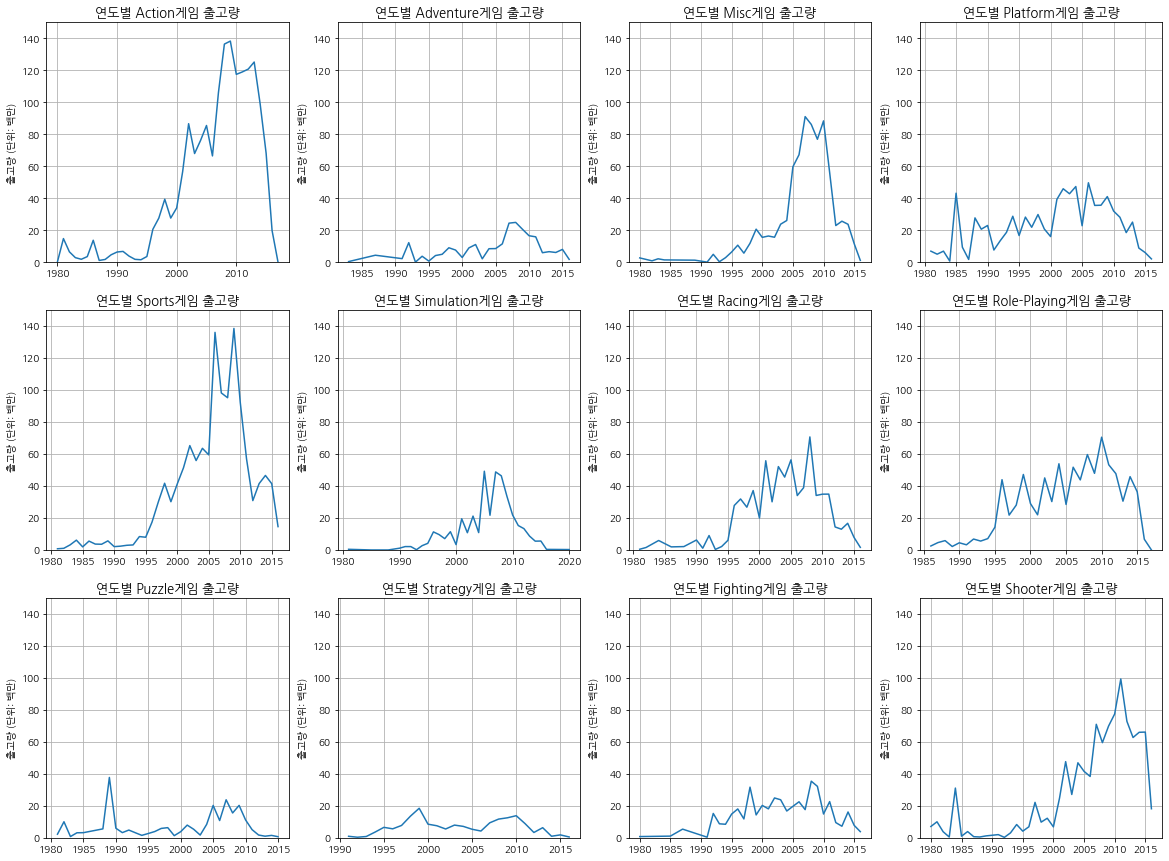

In [117]:
### 2. 연도별 장르에 따른 게임 출고량
## 트렌드(유행)이 있었다고 생각한다. 급격한 상승을 보이는 장르가 몇몇 있기 때문.
# 액션, 스포츠, 기타(Misc), 슈팅
plt.figure(figsize=(20,15))

for i, genre in enumerate(game['Genre'].unique()):
  plt.subplot(3,4,1+i)
  plt.plot(game[game['Genre'] == game['Genre'].unique()[i]].groupby('Year')['Total_Sales'].sum())
  plt.ylim(0,150)
  plt.title('연도별 ' + genre + "게임 출고량", fontsize=13)
  plt.ylabel('출고량 (단위: 백만)')
  # plt.xlabel('년도')
  plt.grid(True)

In [44]:
### 3 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함

In [145]:
# 전 지역에서 가장 많이 출고된 순서대로 게임을 정렬 (인덱스도 재정렬)
# 눈에 띄는 점: 닌텐도(퍼블리셔)가 압도적으로 많다.

# 출고량 Top50 게임을 추출
new_game = game.sort_values(by=['Total_Sales'], ascending=False ).reset_index(drop=True)
top50_game = new_game.head(50)

top50_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Spos,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,SupeMao Bs.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mao Ka Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Spos Reso,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tets,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New SupeMao Bs.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New SupeMao Bs. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [186]:
# Counter는 keys(), values()로 딕셔너리의 값을 각각 반환할 수 있다..!
# .most_common() 함수를 사용하여 내림차순으로 Count값 정렬.
from collections import Counter

cnt_pub = Counter(top50_game.Publisher).most_common()
cnt_gen = Counter(top50_game.Genre).most_common()

cnt_pub_df = pd.DataFrame(cnt_pub)
cnt_gen_df = pd.DataFrame(cnt_gen)

Text(0, 0.5, '갯수')

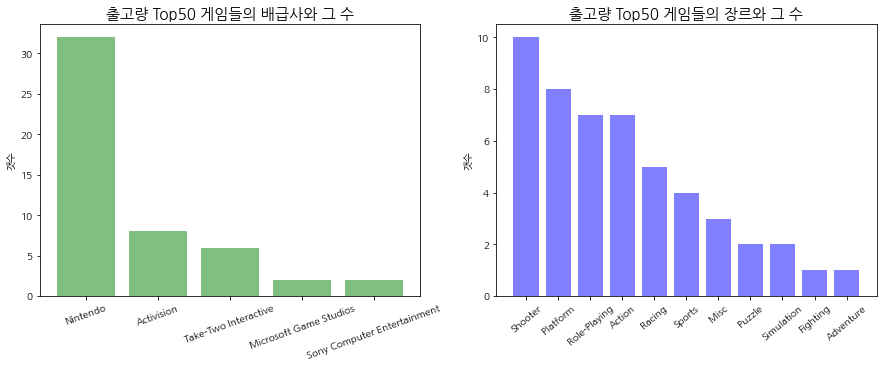

In [189]:
# 출고량 Top50 게임들의 배급사의 종류와 그 수.
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.bar(cnt_pub_df[0], cnt_pub_df[1], color='g', alpha=0.5)
plt.title('출고량 Top50 게임들의 배급사와 그 수', fontsize=15)
plt.xticks(rotation=20)
plt.ylabel('갯수')

# 출고량 Top50 게임들의 장르와 그 수.
plt.subplot(1,2,2)
plt.bar(cnt_gen_df[0], cnt_gen_df[1], color='b', alpha=0.5)
plt.title('출고량 Top50 게임들의 장르와 그 수', fontsize=15)
plt.xticks(rotation=40)
plt.ylabel('갯수')

In [ ]:
# 위의 시각화를 통해서 Nintendo사에서 배급한 게임이 압도적으로 많음을 알 수 있으며
# 장르는 Shooter, Platform, Role-Playing, Action 순서로 인기가 많았다.

Text(0, 0.5, '갯수')

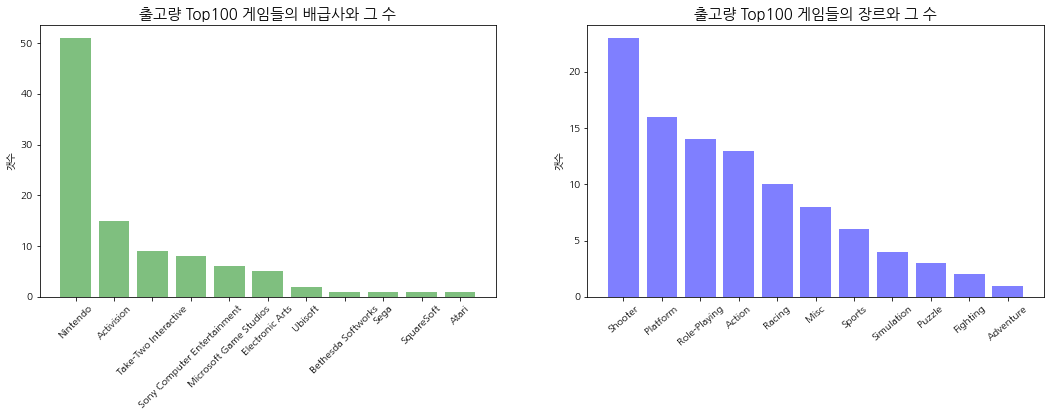

In [488]:
# Top100이라면 결과값이 달라질까?
# 출고량 Top100 게임을 추출
new_game = game.sort_values(by=['Total_Sales'], ascending=False ).reset_index(drop=True)
top100_game = new_game.head(100)

cnt_pub2 = Counter(top100_game.Publisher).most_common()
cnt_gen2 = Counter(top100_game.Genre).most_common()

cnt_pub_df2 = pd.DataFrame(cnt_pub2)
cnt_gen_df2 = pd.DataFrame(cnt_gen2)

# 출고량 Top100 게임들의 배급사의 종류와 그 수.
plt.figure(figsize=(18, 5))

plt.subplot(1,2,1)
plt.bar(cnt_pub_df2[0], cnt_pub_df2[1], color='g', alpha=0.5)
plt.title('출고량 Top100 게임들의 배급사와 그 수', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('갯수')

# 출고량 Top100 게임들의 장르와 그 수.
plt.subplot(1,2,2)
plt.bar(cnt_gen_df2[0], cnt_gen_df2[1], color='b', alpha=0.5)
plt.title('출고량 Top100 게임들의 장르와 그 수', fontsize=15)
plt.xticks(rotation=40)
plt.ylabel('갯수')

In [ ]:
# 역시나 Nintendo에서 배급한 게임이 압도적으로 많다. 그 다음은 Activison, Take-Two Interactive ... 순
# 게임 장르의 경우 Shooter, Platform, Role-Playing, Action .. 순으로 Top50과 동일하다.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

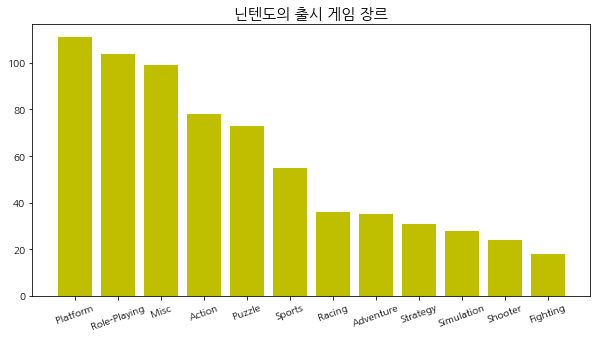

In [302]:
# 닌텐도는 주로 어떤 장르의 게임을 배급(출시)할까?
nin_gen = game[game['Publisher'] =='Nintendo']['Genre'].value_counts()
nin_gen = pd.DataFrame(nin_gen)
nin_gen.reset_index(inplace=True)
nin_gen.columns = ['Genre', 'Count']

# 그래프로 표시
plt.figure(figsize=(10, 5))
plt.bar(nin_gen.Genre, nin_gen.Count, color='y')
plt.title('닌텐도의 출시 게임 장르', fontsize=15)
plt.xticks(rotation=20)

In [ ]:
# 연도에 따른 플랫폼 별 인기도도 보고싶음.
# game 데이터프레임에 'quarter'라는 이름의 새로운 컬럼을 생성하여 연도별로 구분을 지어준다.
game['quarter'] = np.repeat('quarter', len(game))
    
for i in range(len(game['Year'])):
  if game['Year'][i] <= 1985:
    game['quarter'][i] = '1980-1985'
  elif game['Year'][i] > 1985 and game['Year'][i] <= 1990:
    game['quarter'][i] = '1985-1990'
  elif game['Year'][i] > 1990 and game['Year'][i] <= 1995:
    game['quarter'][i] = '1990-1995'
  elif game['Year'][i] > 1995 and game['Year'][i] <= 2000:
    game['quarter'][i] = '1995-2000'
  elif game['Year'][i] > 2000 and game['Year'][i] <= 2005:
    game['quarter'][i] = '2000-2005'
  elif game['Year'][i] > 2005 and game['Year'][i] <= 2010:
    game['quarter'][i] = '2005-2010'
  elif game['Year'][i] > 2010 and game['Year'][i] <= 2015:
    game['quarter'][i] = '2010-2015'
  else:
    game['quarter'][i] = '2015-2020'

In [344]:
# 값이 제대로 입력되었음을 확인.
game[['Year', 'quarter']]

,Year,quarter
0,2008,2005-2010
1,2009,2005-2010
2,2010,2005-2010
3,2010,2005-2010
4,2010,2005-2010
...,...,...
16250,2006,2005-2010
16251,2005,2000-2005
16252,2015,2010-2015
16253,2013,2010-2015


In [427]:
# for을 사용하기 위해서 분기를 오름차순으로 정렬했으나, 시간 부족으로 사용하지 못했다.
years = game['quarter'].unique()
years = np.sort(years)
years

array(['1980-1985', '1985-1990', '1990-1995', '1995-2000', '2000-2005',
       '2005-2010', '2010-2015', '2015-2020'], dtype=object)

In [430]:
var1 = game[game['quarter'] =='1980-1985']['Platform'].value_counts()
var2 = game[game['quarter'] =='1985-1990']['Platform'].value_counts()
var3 = game[game['quarter'] =='1990-1995']['Platform'].value_counts()
var4 = game[game['quarter'] =='1995-2000']['Platform'].value_counts()
var5 = game[game['quarter'] =='2000-2005']['Platform'].value_counts()
var6 = game[game['quarter'] =='2005-2010']['Platform'].value_counts()
var7 = game[game['quarter'] =='2010-2015']['Platform'].value_counts()
var8 = game[game['quarter'] =='2015-2020']['Platform'].value_counts()

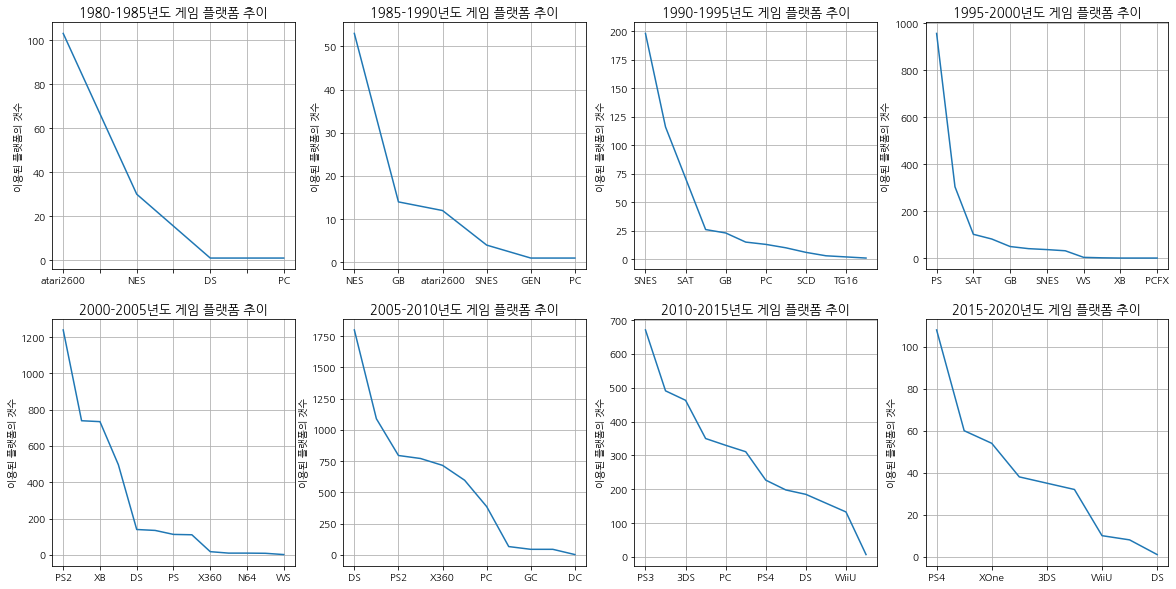

In [441]:
# 막대그래프로 표현했어야 하는데, 시간이 부족하다.
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
var1.plot(rot=0)
plt.title('1980-1985년도 게임 플랫폼 추이', fontsize=13)
plt.ylabel('이용된 플랫폼의 갯수')
plt.grid(True)

plt.subplot(2,4,2)
var2.plot(rot=0)
plt.title('1985-1990년도 게임 플랫폼 추이', fontsize=13)
plt.ylabel('이용된 플랫폼의 갯수')
plt.grid(True)

plt.subplot(2,4,3)
var3.plot(rot=0)
plt.title('1990-1995년도 게임 플랫폼 추이', fontsize=13)
plt.ylabel('이용된 플랫폼의 갯수')
plt.grid(True)

plt.subplot(2,4,4)
var4.plot(rot=0)
plt.title('1995-2000년도 게임 플랫폼 추이', fontsize=13)
plt.ylabel('이용된 플랫폼의 갯수')
plt.grid(True)

plt.subplot(2,4,5)
var5.plot(rot=0)
plt.title('2000-2005년도 게임 플랫폼 추이', fontsize=13)
plt.ylabel('이용된 플랫폼의 갯수')
plt.grid(True)

plt.subplot(2,4,6)
var6.plot(rot=0)
plt.title('2005-2010년도 게임 플랫폼 추이', fontsize=13)
plt.ylabel('이용된 플랫폼의 갯수')
plt.grid(True)

plt.subplot(2,4,7)
var7.plot(rot=0)
plt.title('2010-2015년도 게임 플랫폼 추이', fontsize=13)
plt.ylabel('이용된 플랫폼의 갯수')
plt.grid(True)

plt.subplot(2,4,8)
var8.plot(rot=0)
plt.title('2015-2020년도 게임 플랫폼 추이', fontsize=13)
plt.ylabel('이용된 플랫폼의 갯수')
plt.grid(True)

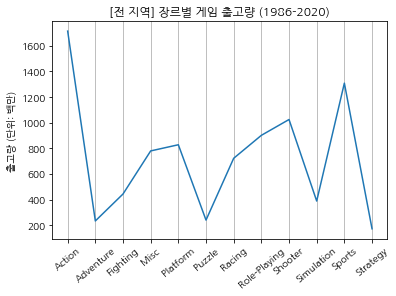

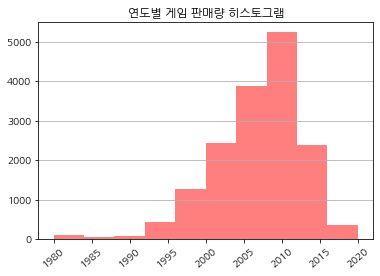

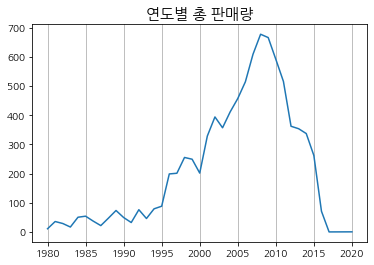

In [440]:
# 연도별 총 출고량 시각화
plt.plot(game.groupby('Genre')['Total_Sales'].sum())
plt.title(str("[전 지역] 장르별 게임 출고량 (1986-2020)"))
plt.ylabel('출고량 (단위: 백만)')
plt.xticks(rotation=40)
plt.grid(axis='x')
plt.show()

# 게임 시장
plt.hist(game['Year'], color='r', alpha=0.5)
plt.title('연도별 게임 판매량 히스토그램')
plt.grid(True, axis='y')
plt.xticks(rotation=40)
plt.show()

# 연도별 총 출고량 시각화
plt.plot(game.groupby('Year')['Total_Sales'].sum())
plt.title(str("연도별 총 판매량"),fontsize=15)
plt.grid(axis='x')
plt.show()